# **BFSI Credit Risk Assignment**

In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import *
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
import lightgbm as ltb



## Step 1: Loading the Datasets

In [2]:
main_loan = pd.read_csv("main_loan_base.csv")
monthly_balance = pd.read_csv("monthly_balance_base.csv")
repayment = pd.read_csv("repayment_base.csv")

In [3]:
print(f"The shape of Main loan dataset is: {main_loan.shape}")
print(f"The shape of Monthly balance dataset is: {monthly_balance.shape}")
print(f"The shape of Repayment dataset is: {repayment.shape}")

The shape of Main loan dataset is: (50000, 15)
The shape of Monthly balance dataset is: (4002490, 3)
The shape of Repayment dataset is: (626601, 3)


In [4]:
main_loan.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [5]:
monthly_balance.head()

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


In [6]:
repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [7]:
main_loan.isna().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
dtype: int64

In [8]:
monthly_balance.isnull().sum()

loan_acc_num      0
date              0
balance_amount    0
dtype: int64

In [9]:
repayment.isnull().sum()

loan_acc_num        0
repayment_amount    0
repayment_date      0
dtype: int64

* Removing duplicates from the Main Loan dataset

In [10]:
main_loan= main_loan[~main_loan['loan_acc_num'].duplicated()]
main_loan.shape

(49985, 15)

* ### Importing the test datasets

In [11]:
test_main_loan = pd.read_csv("test_main_loan_base.csv")
test_monthly_balance = pd.read_csv("test_monthly_balance_base.csv")
test_repayment = pd.read_csv("test_repayment_base.csv")

In [12]:
print(f"The shape of Test main loan dataset is: {test_main_loan.shape}")
print(f"The shape of Test monthly balance dataset is: {test_monthly_balance.shape}")
print(f"The shape of Test repayment dataset is: {test_repayment.shape}")

The shape of Test main loan dataset is: (10000, 15)
The shape of Test monthly balance dataset is: (801407, 3)
The shape of Test repayment dataset is: (125860, 3)


In [13]:
test_main_loan.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


In [14]:
test_monthly_balance.head()

,loan_acc_num,date,balance_amount
0,LN14086568,2006-12-13,9014.212689
1,LN14086568,2007-01-12,28129.516540
2,LN14086568,2007-02-11,10820.366663
3,LN14086568,2007-03-13,32491.477851
4,LN14086568,2007-04-12,24982.192310


In [15]:
test_repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN14086568,111925.040000,2014-12-19
1,LN14086568,111925.040000,2015-01-26
2,LN14086568,111925.040000,2015-02-21
3,LN14086568,111925.040000,2015-03-20
4,LN14086568,11590.317813,2015-04-26


In [16]:
test_main_loan.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
dtype: int64

In [17]:
test_monthly_balance.isnull().sum()

loan_acc_num      0
date              0
balance_amount    0
dtype: int64

In [18]:
test_repayment.isnull().sum()

loan_acc_num        0
repayment_amount    0
repayment_date      0
dtype: int64

* Removing duplicates from the Main Loan dataset, as we did for the Mail loan dataset.

In [19]:
test_main_loan = test_main_loan[~test_main_loan["loan_acc_num"].duplicated()]
test_main_loan.shape

(9997, 15)

## Step 2: Data Analysis of the dataseets.

In [20]:
main_loan['disbursal_date'] = pd.to_datetime(main_loan['disbursal_date'], infer_datetime_format=True)
main_loan['default_date'] = pd.to_datetime(main_loan['default_date'], infer_datetime_format=True)

In [21]:
test_main_loan['disbursal_date'] = pd.to_datetime(test_main_loan['disbursal_date'], infer_datetime_format=True)
test_main_loan['default_date'] = pd.to_datetime(test_main_loan['default_date'], infer_datetime_format=True)

In [22]:
main_loan.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [23]:
test_main_loan.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


In [24]:
repayment = round(repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
repayment = pd.DataFrame({"loan_acc_num":repayment.index, "repayment_amount":repayment.values})
repayment.head()

,loan_acc_num,repayment_amount
0,LN10000701,40020.99
1,LN10001077,112218.47
2,LN10004116,290634.94
3,LN10007976,337321.72
4,LN10010204,61290.49


In [25]:
test_repayment = round(test_repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
test_repayment = pd.DataFrame({"loan_acc_num":test_repayment.index, "repayment_amount":test_repayment.values})
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.31
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [26]:
print(f"The shape of repayment dataset is: {repayment.shape}")
print(f"The shape of test repayment dataset is: {test_repayment.shape}")

The shape of repayment dataset is: (46008, 2)
The shape of test repayment dataset is: (9229, 2)


* ### Creating the new database both for original and test database.

In [27]:
new_main_loan = pd.merge(
    left=main_loan,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [28]:
test_new_main_loan = pd.merge(
    left=test_main_loan,
    right=test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [29]:
print(f"The shape of new_main_loan dataset is: {new_main_loan.shape}")
print(f"The shape of test_new_main_loan dataset is: {test_new_main_loan.shape}")

The shape of new_main_loan dataset is: (49985, 16)
The shape of test_new_main_loan dataset is: (9997, 16)


* Deriving the LGD target value

In [30]:

new_main_loan['target'] = (new_main_loan['loan_amount']-(new_main_loan['collateral_value']+new_main_loan['repayment_amount']))/new_main_loan['loan_amount']
test_new_main_loan['target'] = (test_new_main_loan['loan_amount']-(test_new_main_loan['collateral_value']+test_new_main_loan['repayment_amount']))/test_new_main_loan['loan_amount']

In [31]:
new_main_loan.head(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58,0.155774
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61,0.121187
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73,0.609336
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,NaN,NaN
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51,0.361464


In [32]:
test_new_main_loan.head(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.05,0.455114
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.65,0.791917
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.52,0.421549
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.58,0.768804
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.64,0.152124


* Handling the Null Values in the new datasets

In [33]:
new_main_loan.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
target               3977
dtype: int64

In [34]:
# null value imputation

new_main_loan['repayment_amount'] = new_main_loan['repayment_amount'].fillna(0)
new_main_loan['target'] = new_main_loan['target'].fillna(new_main_loan['target'].mean())

In [35]:
new_main_loan.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
repayment_amount     0
target               0
dtype: int64

In [36]:
test_new_main_loan.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
target               768
dtype: int64

In [37]:
#null value imputation
test_new_main_loan['repayment_amount'] = test_new_main_loan['repayment_amount'].fillna(0)
test_new_main_loan['target'] = test_new_main_loan['target'].fillna(test_new_main_loan['target'].mean())

In [38]:
test_new_main_loan.isnull().sum()

loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
repayment_amount     0
target               0
dtype: int64

* Feature engineering: Creating new variable for both new datasets

In [39]:
new_main_loan['due'] = new_main_loan['loan_amount'] - new_main_loan['repayment_amount']
test_new_main_loan['due'] = test_new_main_loan['loan_amount'] - test_new_main_loan['repayment_amount']

In [40]:
# finding the unique loan accounts in the original and test monthly balance datasets
 
print(f"The count of unique accounts in original monthly_balance dataset is {monthly_balance['loan_acc_num'].nunique()}")
print(f"The count of unique accounts in original monthly_balance dataset is {test_monthly_balance['loan_acc_num'].nunique()}")


The count of unique accounts in original monthly_balance dataset is 49671
The count of unique accounts in original monthly_balance dataset is 9940


In [41]:
monthly_balance.head(5)

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


In [42]:
test_monthly_balance.head()

,loan_acc_num,date,balance_amount
0,LN14086568,2006-12-13,9014.212689
1,LN14086568,2007-01-12,28129.516540
2,LN14086568,2007-02-11,10820.366663
3,LN14086568,2007-03-13,32491.477851
4,LN14086568,2007-04-12,24982.192310


In [43]:
monthly_balance =round(monthly_balance.groupby('loan_acc_num')['balance_amount'].mean(),2)
monthly_balance = pd.DataFrame({"loan_acc_num":monthly_balance.index, "average_monthly_balance":monthly_balance.values})
monthly_balance.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.88
1,LN10001077,2296.28
2,LN10004116,8887.38
3,LN10007976,9420.56
4,LN10010204,6446.21


In [44]:
test_monthly_balance = round(test_monthly_balance.groupby('loan_acc_num')['balance_amount'].mean(),2)
test_monthly_balance= pd.DataFrame({"loan_acc_num":test_monthly_balance.index, "average_monthly_balance":test_monthly_balance.values})
test_monthly_balance.head()

,loan_acc_num,average_monthly_balance
0,LN10011015,25.09
1,LN10028091,62.53
2,LN10033713,182.41
3,LN10045654,1838.35
4,LN10051605,3374.17


* Now merging the datasets of main loan and monthly balance both for original and test datasets.

In [45]:
#Merge the datasets
new_data = pd.merge(
    left=new_main_loan,
    right=monthly_balance,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)
new_data.shape

(49985, 19)

In [46]:
#Merge the datasets
test_new_data= pd.merge(
    left=test_new_main_loan,
    right=test_monthly_balance,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)
test_new_data.shape

(9997, 19)

In [47]:
new_data.isnull().sum()

loan_acc_num                 0
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
repayment_amount             0
target                       0
due                          0
average_monthly_balance    314
dtype: int64

In [48]:
test_new_data.isnull().sum()

loan_acc_num                0
customer_name               0
customer_address            0
loan_type                   0
loan_amount                 0
collateral_value            0
cheque_bounces              0
number_of_loans             0
missed_repayments           0
vintage_in_months           0
tenure_years                0
interest                    0
monthly_emi                 0
disbursal_date              0
default_date                0
repayment_amount            0
target                      0
due                         0
average_monthly_balance    57
dtype: int64

In [49]:
new_data['average_monthly_balance'] = new_data['average_monthly_balance'] = new_data['average_monthly_balance'].fillna(new_data['average_monthly_balance'].mean())
test_new_data['average_monthly_balance'] = test_new_data['average_monthly_balance'] = test_new_data['average_monthly_balance'].fillna(test_new_data['average_monthly_balance'].mean())

In [50]:
new_data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [51]:
test_new_data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [52]:
new_data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,target,due,average_monthly_balance
count,4.998500e+04,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,4.998500e+04,49985.000000,4.998500e+04,49985.000000
mean,3.817142e+05,57195.113444,1.764769,1.509573,9.807482,80.016705,2.994578,11.484611,16593.115676,1.514337e+05,0.423265,2.302806e+05,7679.277191
std,5.037769e+05,93412.679667,1.760305,1.259326,7.787036,44.141987,1.415455,2.019790,26696.292090,2.554824e+05,0.225701,3.437854e+05,16071.151167
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,-5.708000,-8.573322e+04,0.100000
25%,2.393400e+04,3329.430000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1158.280000,6.761950e+03,0.242430,1.580488e+04,417.980000
50%,1.926920e+05,19866.280000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6541.020000,4.849626e+04,0.423265,9.599627e+04,2186.470000
75%,4.334780e+05,62323.370000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19438.430000,1.668996e+05,0.600358,2.602902e+05,7557.930000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,0.898372,1.997948e+06,261799.900000


* **Now dropping the records with negative LGD**

In [53]:
new_data = new_data.drop(new_data[new_data['target']<0].index)

In [54]:
# Creating a copy of the test dataset.

test=test_new_data.copy()

## Step 3: EDA

* Separating the numeric and categorical features.

In [55]:
numeric_data = new_data.select_dtypes(include=[np.number])
categorical_data = new_data.select_dtypes(exclude=[np.number])

In [56]:
print(f"The shape of the numeric_data dataset is: {numeric_data.shape}")
print(f"The shape of test categorical_data dataset is: {categorical_data.shape}")

The shape of the numeric_data dataset is: (49889, 13)
The shape of test categorical_data dataset is: (49889, 6)


* Identifying the top 10 correlated features

In [57]:

def get_redundant_pairs(new):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = new.columns
    for i in range(0, new.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(new, n=10):
    au_corr = new.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(new)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top 10 Absolute Correlations")
print(get_top_abs_correlations(numeric_data, 10))

Top 10 Absolute Correlations
loan_amount        due                        0.886538
                   monthly_emi                0.819133
                   collateral_value           0.809763
collateral_value   due                        0.803826
monthly_emi        average_monthly_balance    0.798077
loan_amount        repayment_amount           0.780483
monthly_emi        due                        0.718615
repayment_amount   average_monthly_balance    0.714145
vintage_in_months  target                     0.705141
collateral_value   monthly_emi                0.668101
dtype: float64


* Listing down the insights

In [58]:
print(f"Average Monthly EMI is: {round(mean(new_data['monthly_emi']),2)}")
print(f"Average Repayment Amount is: {round(mean(new_data['repayment_amount']),2)}")
print(f"Average Loan Amount is: {round(mean(new_data['loan_amount']),2)}")

Average Monthly EMI is: 16553.64
Average Repayment Amount is: 150993.26
Average Loan Amount is: 381630.43


* ### Univariate Analysis

In [59]:
new_data.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target,due,average_monthly_balance
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58,0.155774,8343.42,585.51
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61,0.121187,24940.39,7382.03
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73,0.609336,412952.27,7812.88
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,0.00,0.423265,52125.00,518.08
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51,0.361464,4172.49,323.68


Text(0.5, 1.0, 'Type of loan')

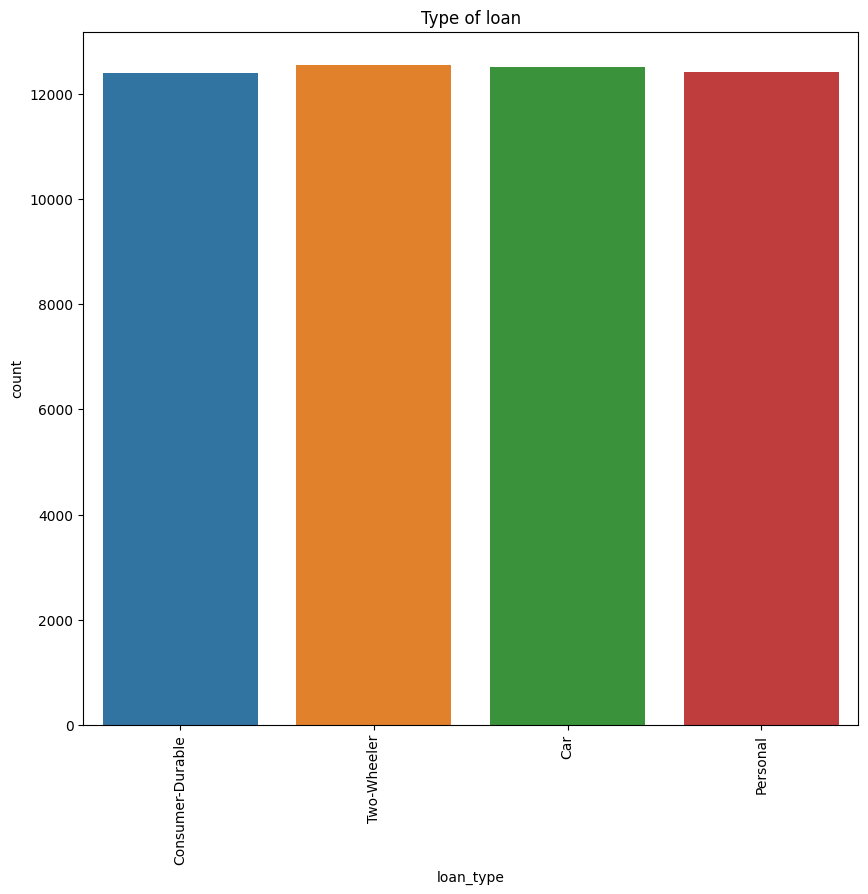

In [60]:
plt.figure(figsize = (10,9))
sns.countplot(data=new_data,x=new_data['loan_type']).tick_params(axis='x', rotation = 90)
plt.title('Type of loan')

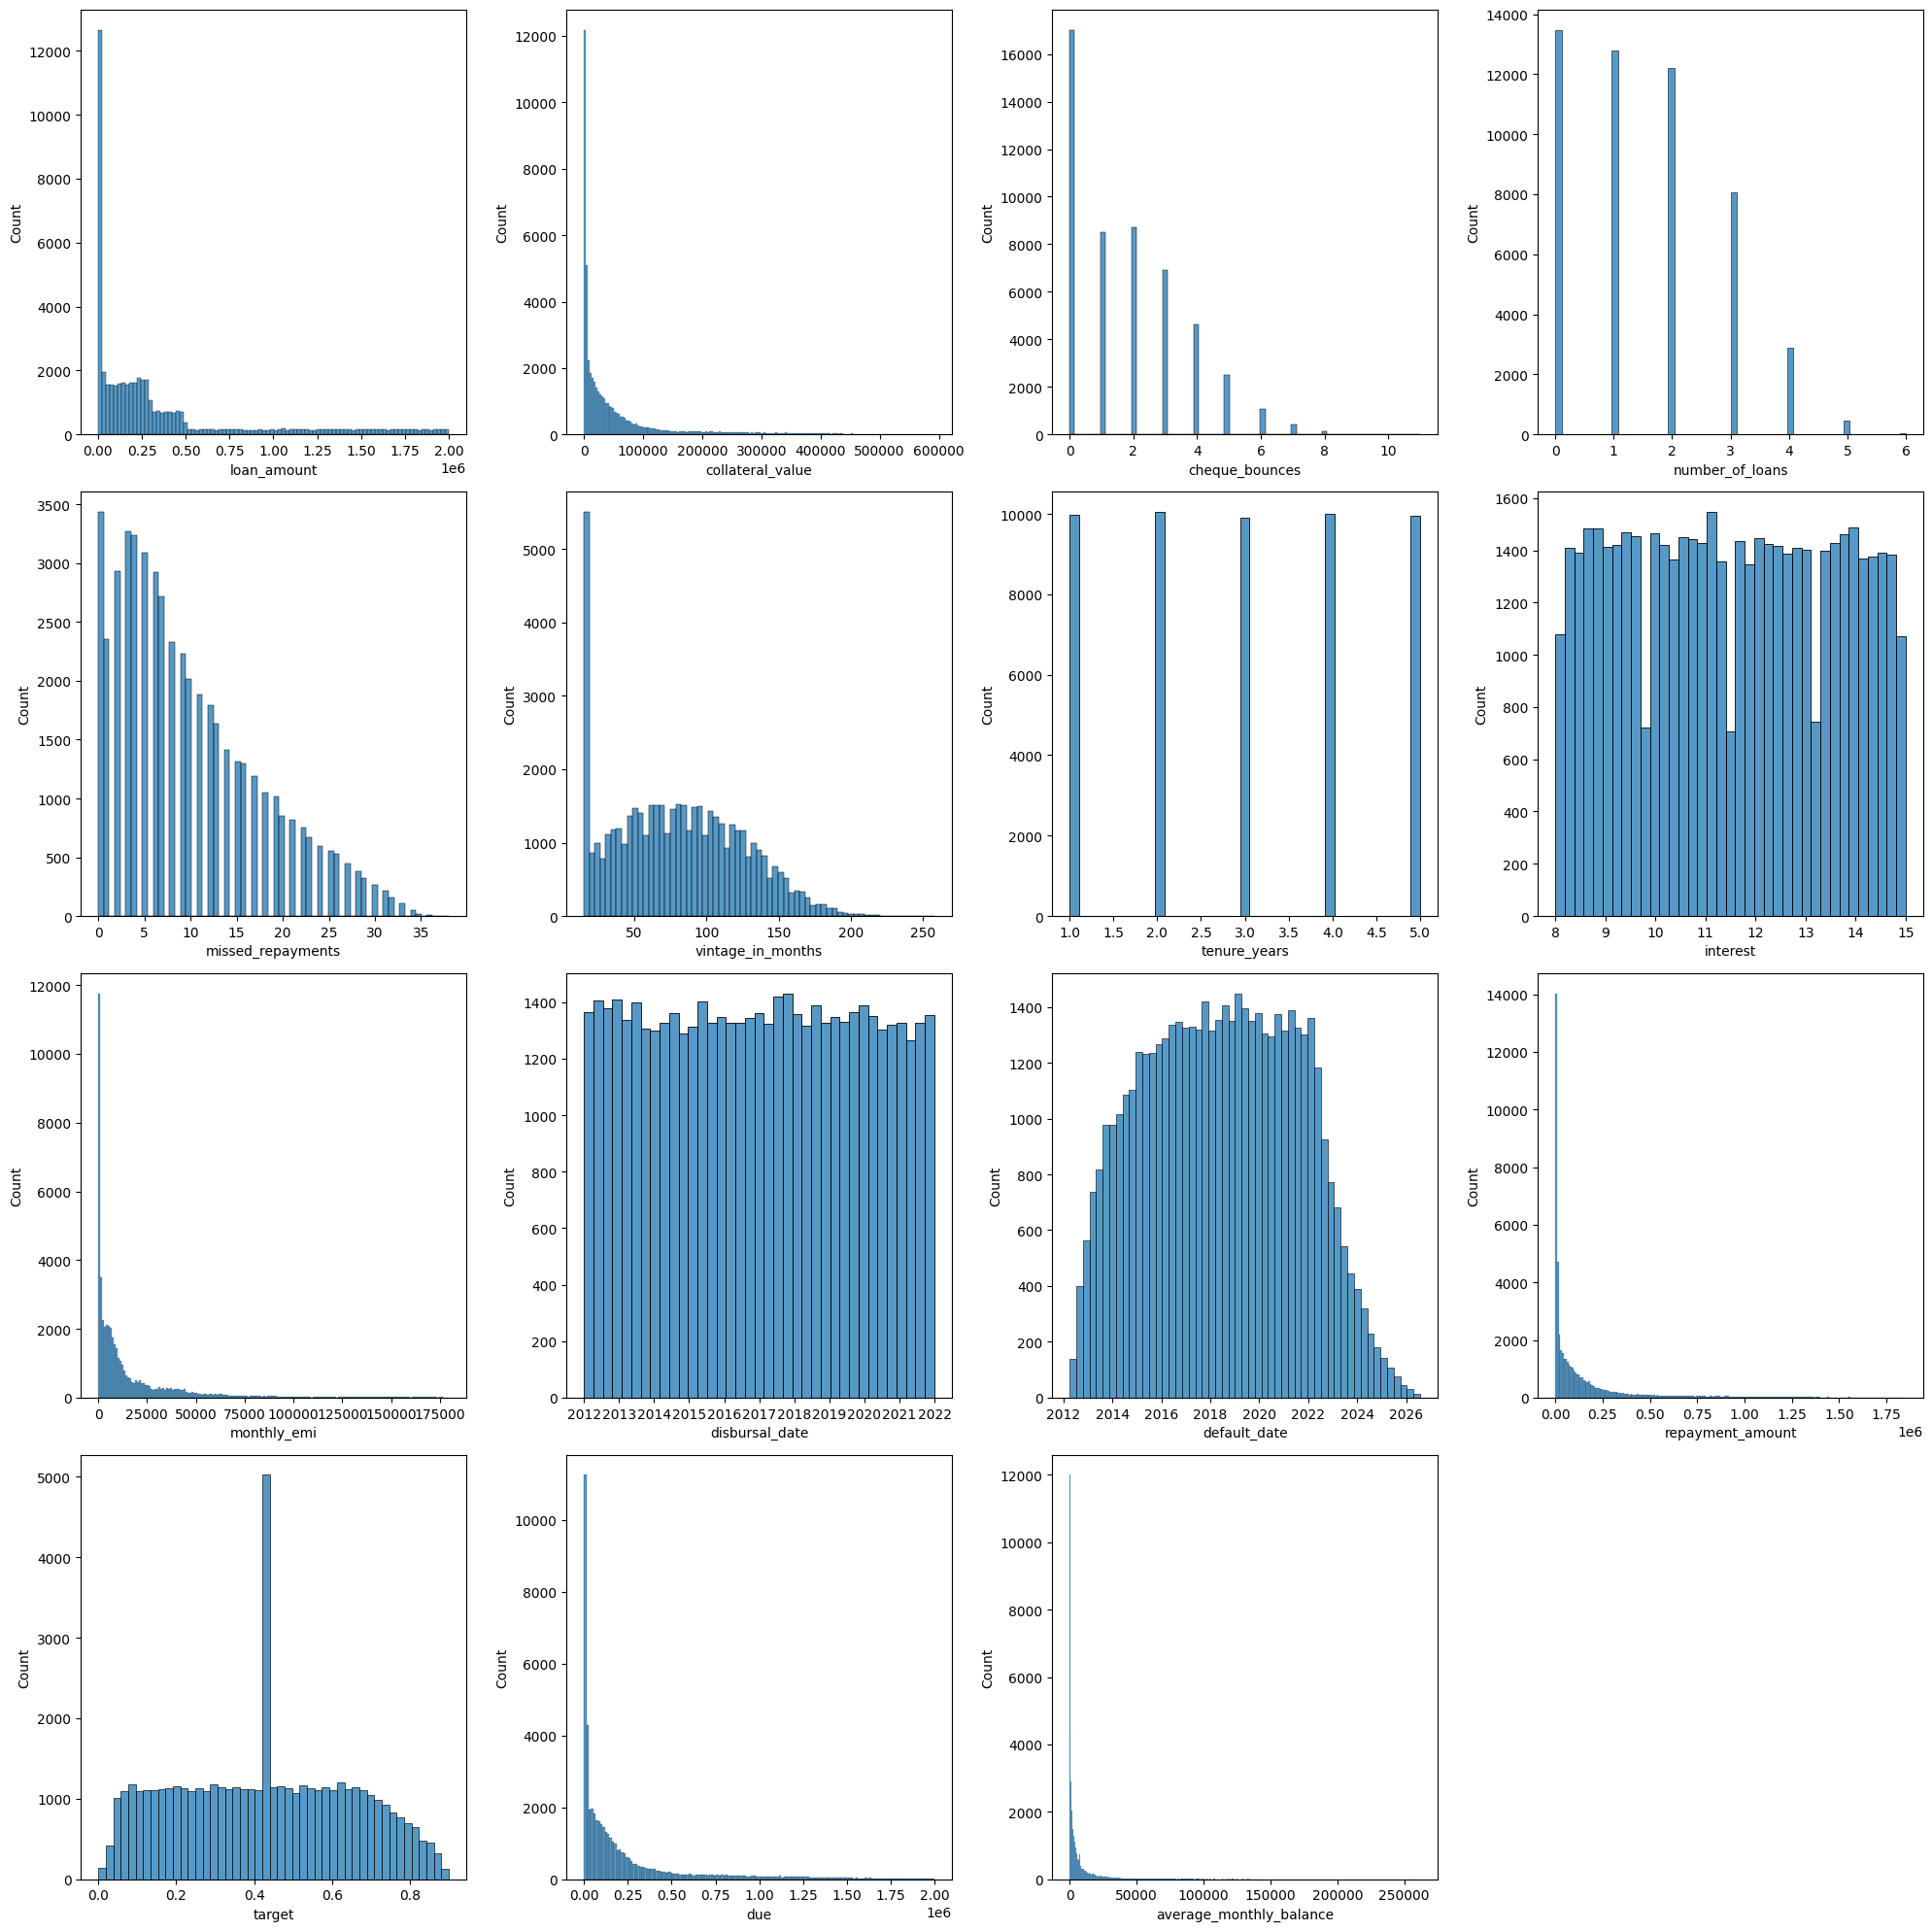

In [61]:
cols = 4
rows = 4
num_cols = new_data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = new_data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<Axes: xlabel='loan_amount', ylabel='repayment_amount'>

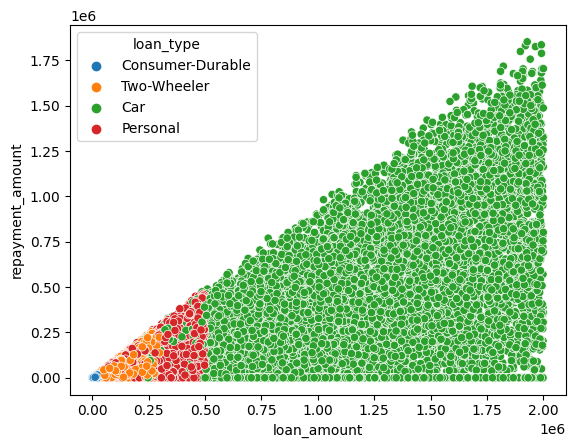

In [62]:
sns.scatterplot(x=new_data.loan_amount, 
                y = new_data.repayment_amount, 
                data=new_data,hue = 'loan_type')

<Figure size 1000x900 with 0 Axes>

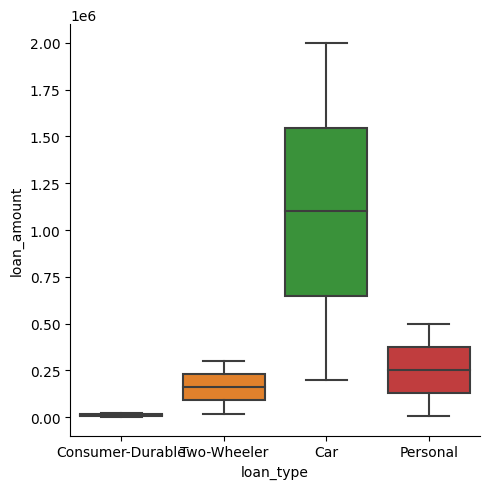

In [63]:
plt.figure(figsize=(10,9))
sns.catplot(data=new_data, x="loan_type", y="loan_amount", kind="box")

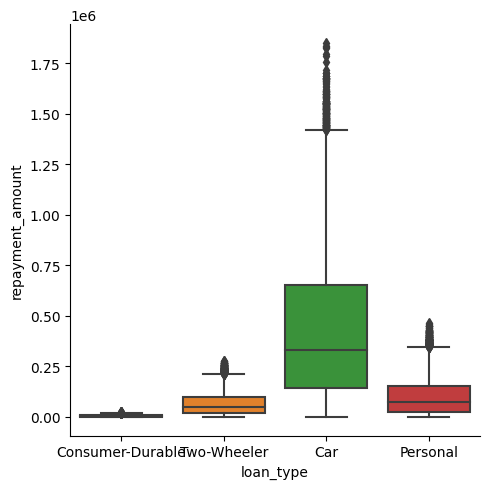

In [64]:
sns.catplot(data=new_data, x="loan_type", y="repayment_amount", kind="box")

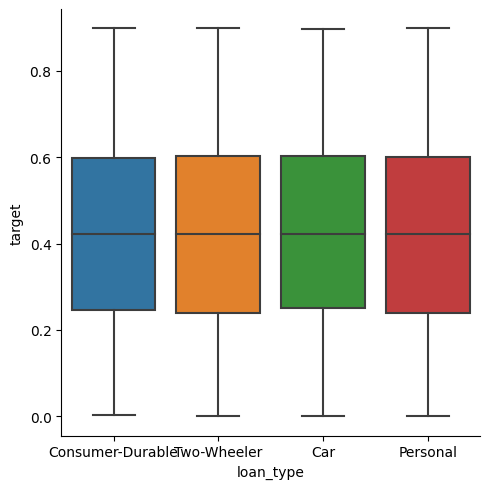

In [65]:
sns.catplot(data=new_data, x="loan_type", y="target", kind="box")

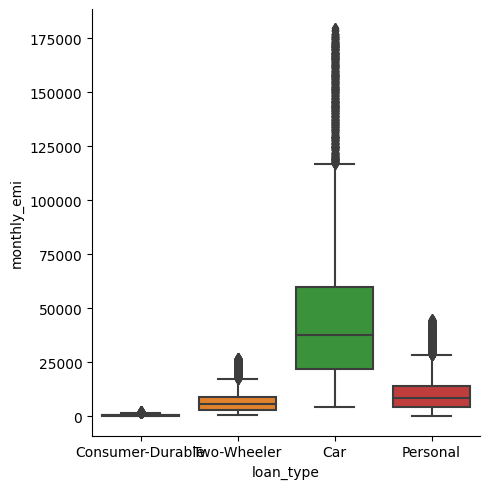

In [66]:
sns.catplot(data=new_data, x="loan_type", y="monthly_emi", kind="box")

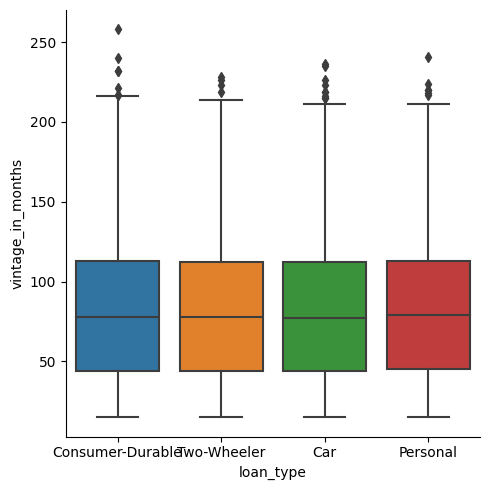

In [67]:
sns.catplot(data=new_data, x="loan_type", y="vintage_in_months", kind="box")

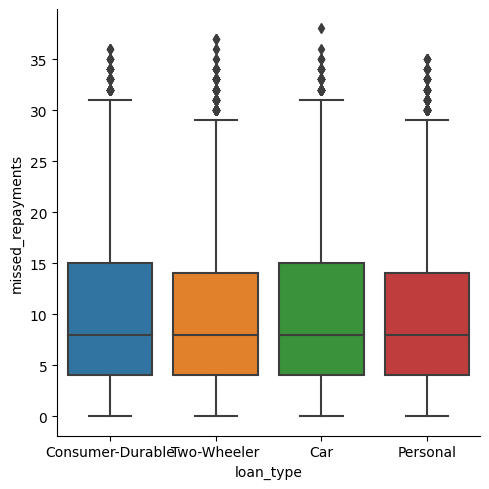

In [68]:
sns.catplot(data=new_data, x="loan_type", y="missed_repayments", kind="box")

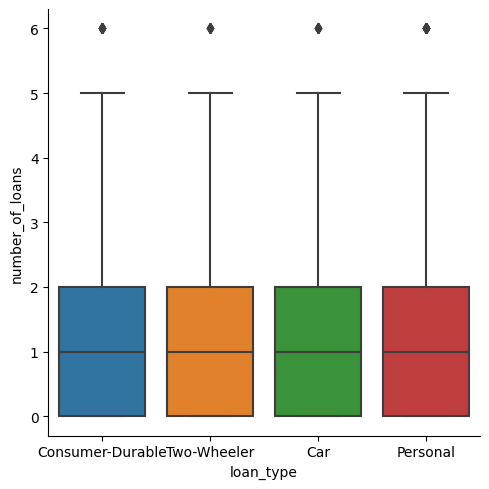

In [69]:
sns.catplot(data=new_data, x="loan_type", y="number_of_loans", kind="box")

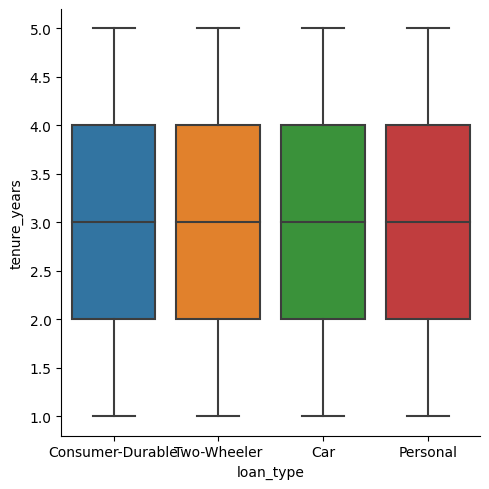

In [70]:
sns.catplot(data=new_data, x="loan_type", y="tenure_years", kind="box")

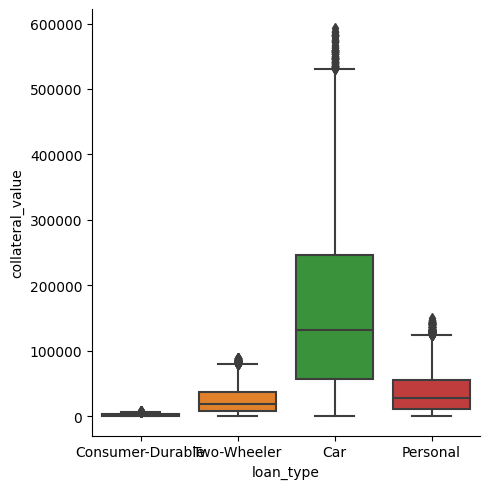

In [71]:
sns.catplot(data=new_data, x="loan_type", y="collateral_value", kind="box")

* Correlation Plot: Heatmap

<Axes: >

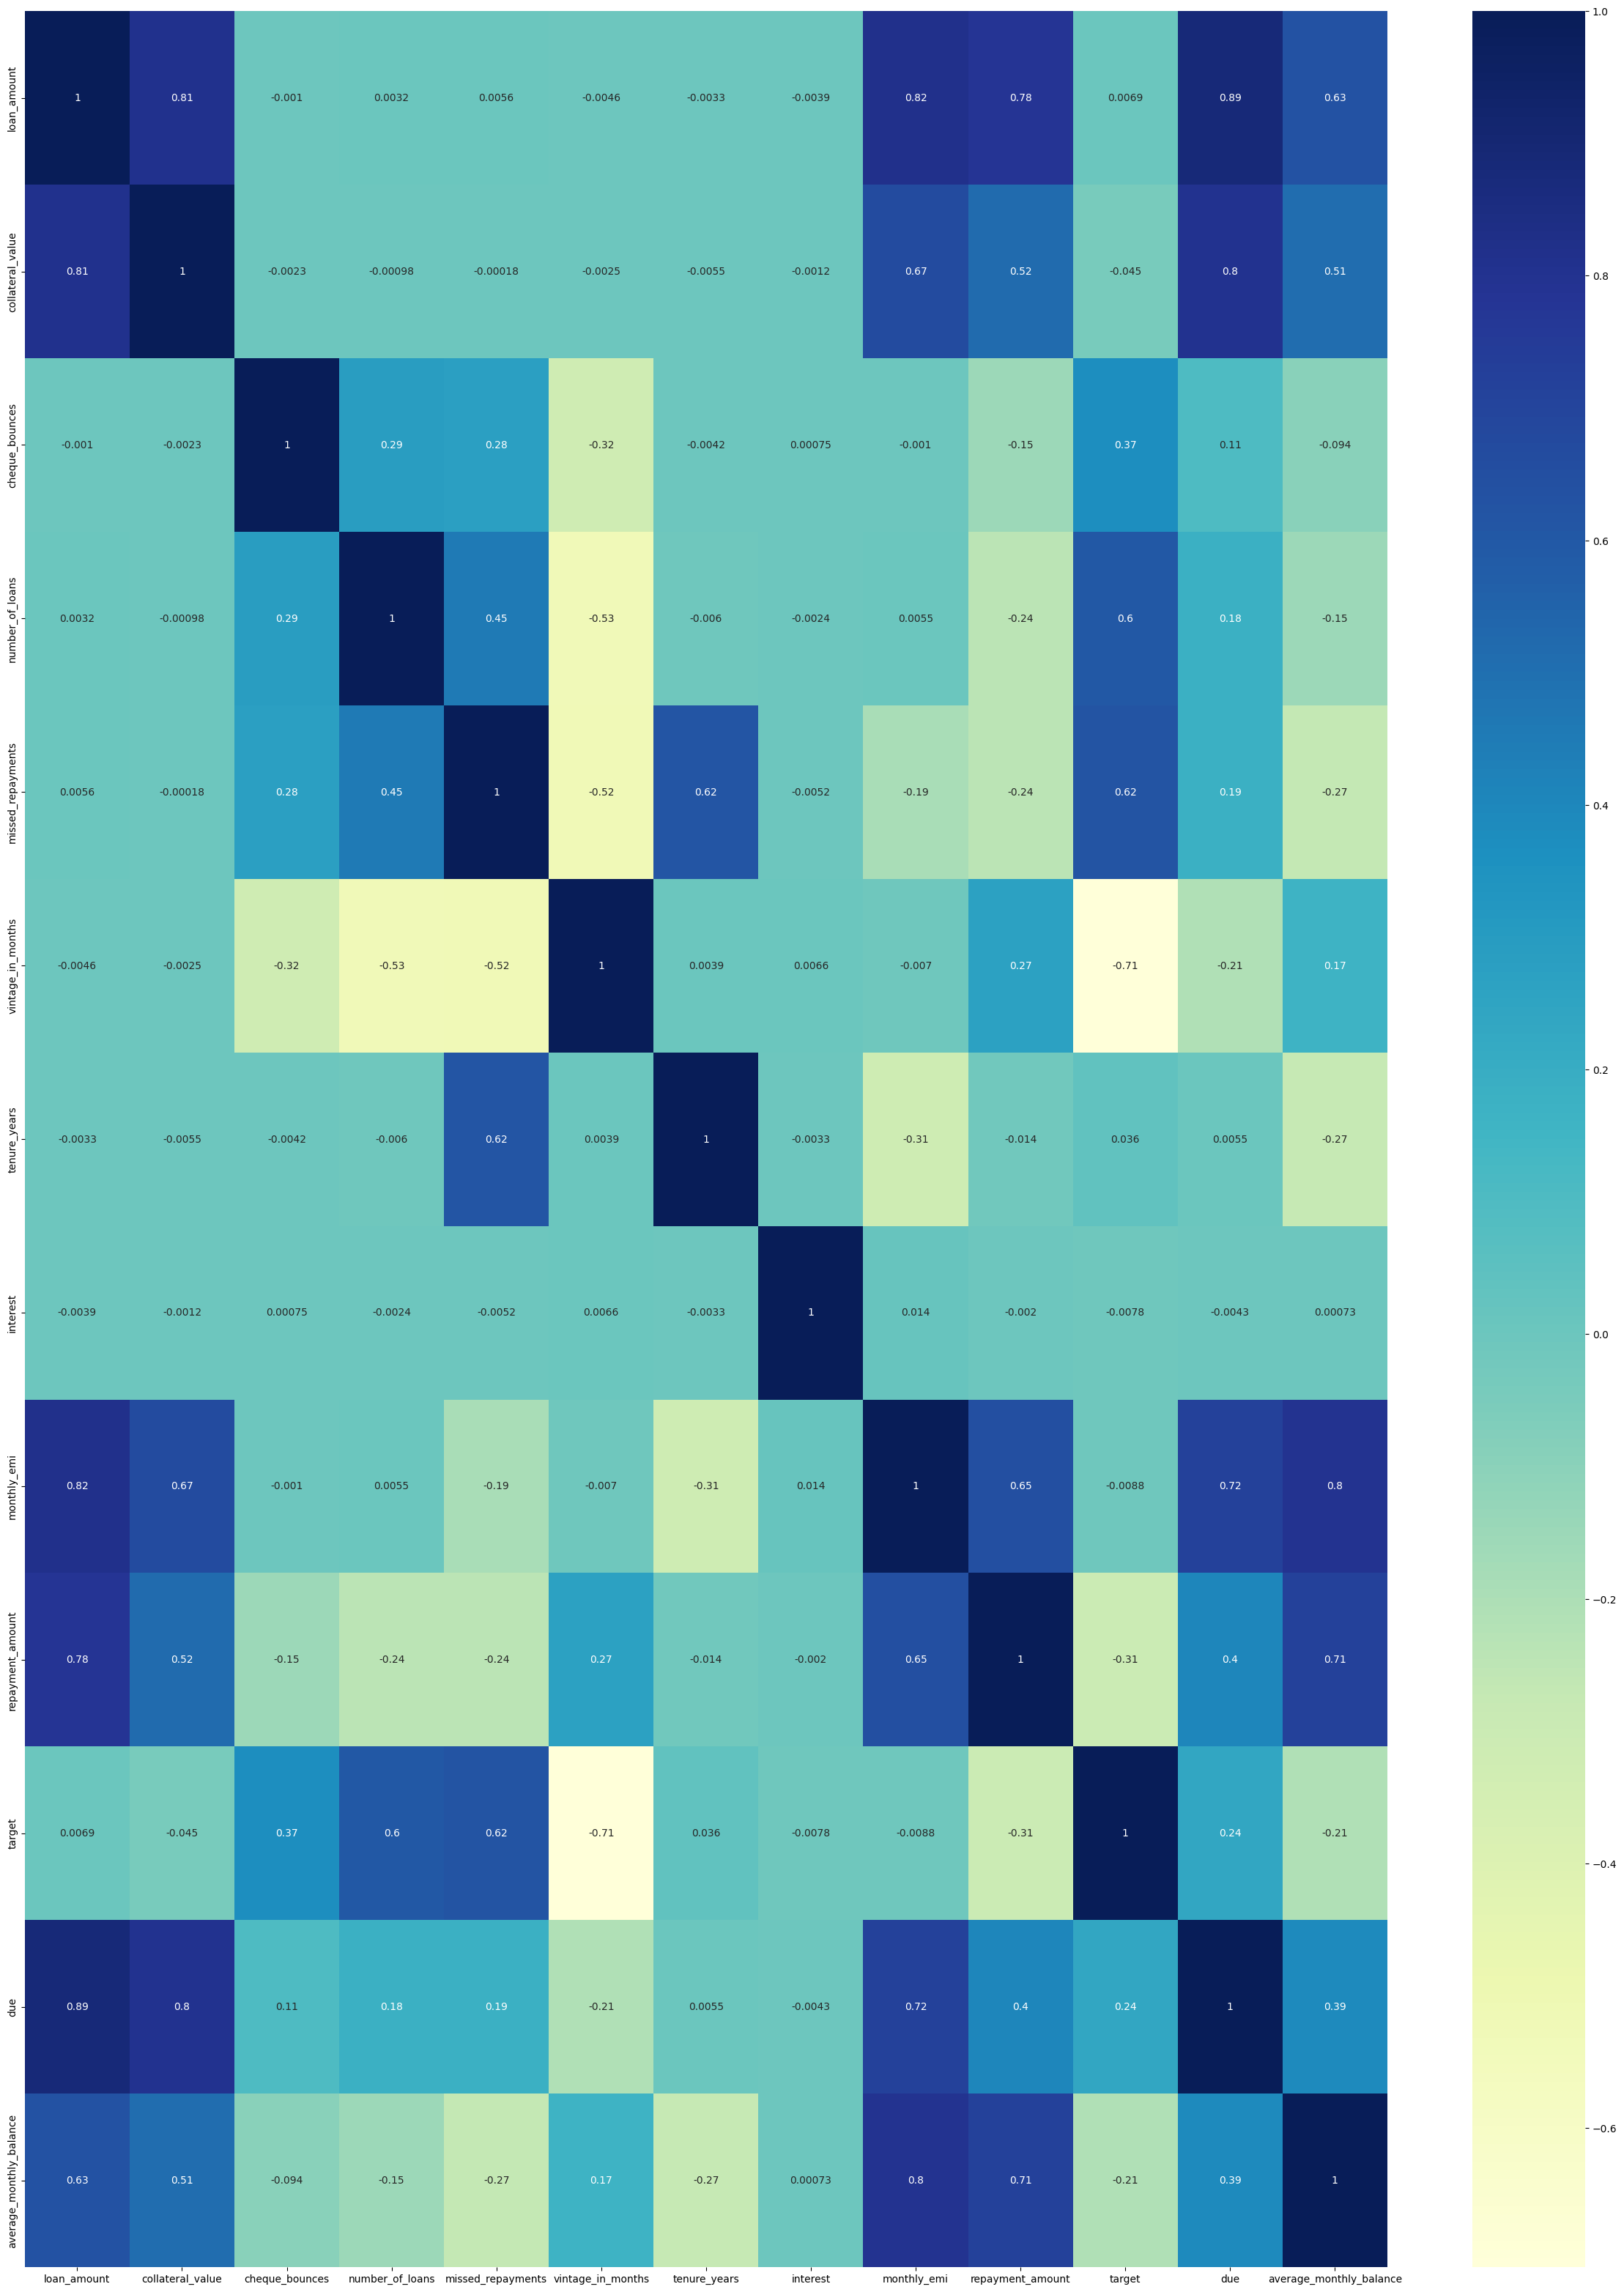

In [72]:
plt.figure(figsize = (30,40))

corr = new_data.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

## Observation from the above EDA is that the Repayment Amount or the EMI amount of Car loan are way higher than other loan types.

* ### Feature engenerring: Variable Transformation

In [73]:
numeric_data.head(5)

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,target,due,average_monthly_balance
0,21916,4929.47,3,0,3,127,2,10.1,1012.32,13572.58,0.155774,8343.42,585.51
1,121184,10254.50,1,0,0,156,2,11.8,5693.24,96243.61,0.121187,24940.39,7382.03
2,487036,116183.86,0,1,10,22,3,14.6,16788.02,74083.73,0.609336,412952.27,7812.88
3,52125,10310.05,5,2,9,30,2,9.6,2395.69,0.00,0.423265,52125.00,518.08
4,8635,1051.25,0,1,3,62,2,9.6,396.87,4462.51,0.361464,4172.49,323.68


Text(0.5, 1.0, 'repayment_amount')

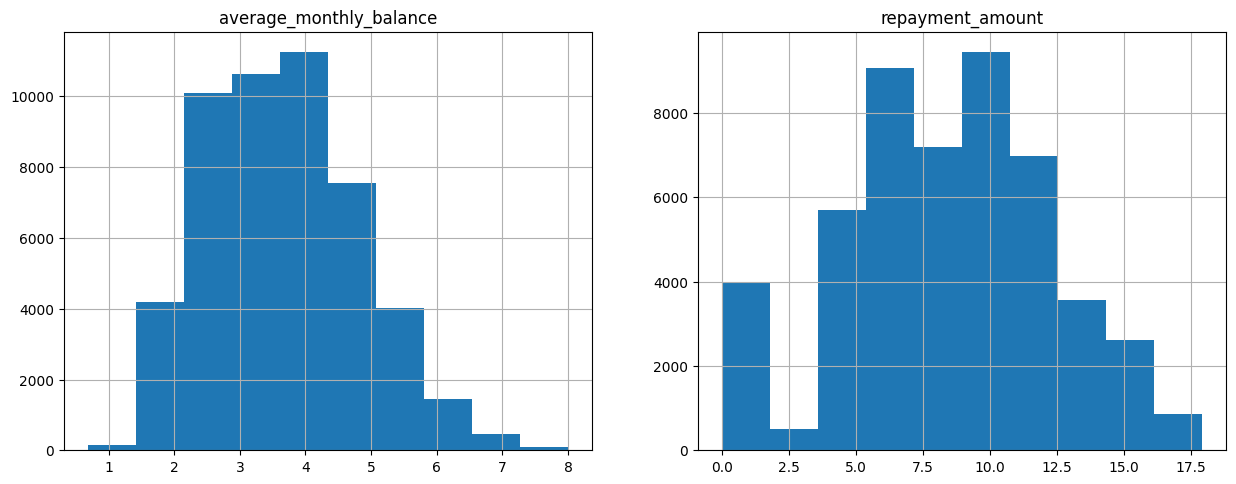

In [74]:
plt.figure(figsize = (15,25))
plt.subplot(4,2,1)
(new_data['average_monthly_balance']**(1/6)).hist()
plt.title('average_monthly_balance')

plt.subplot(4,2,2)
(new_data['repayment_amount']**(1/5)).hist()
plt.title('repayment_amount')


### Now, using the power transformation for data, and test_data for normal distribution

In [75]:
new_data['loan_amount'] = new_data['loan_amount']**(1/5)
new_data['collateral_value'] = new_data['collateral_value']**(1/5)
new_data['cheque_bounces'] = new_data['cheque_bounces']**(1/2)
new_data['missed_repayments'] = new_data['missed_repayments']**(1/2)
new_data['vintage_in_months'] = new_data['vintage_in_months']**(1/2)
new_data['monthly_emi'] = new_data['monthly_emi']**(1/6)
new_data['repayment_amount'] = new_data['repayment_amount']**(1/5)
new_data['average_monthly_balance'] = new_data['average_monthly_balance']**(1/6)

In [76]:
test_new_data['collateral_value'] = test_new_data['collateral_value']**(1/5)
test_new_data['cheque_bounces'] = test_new_data['cheque_bounces']**(1/2)
test_new_data['missed_repayments'] = test_new_data['missed_repayments']**(1/2)
test_new_data['vintage_in_months'] = test_new_data['vintage_in_months']**(1/2)
test_new_data['monthly_emi'] = test_new_data['monthly_emi']**(1/6)
test_new_data['repayment_amount'] = test_new_data['repayment_amount']**(1/5)
test_new_data['average_monthly_balance'] = test_new_data['average_monthly_balance']**(1/8)

In [77]:
categorical_data.head(5)

,loan_acc_num,customer_name,customer_address,loan_type,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,2014-12-25,2016-02-20


* Deriving new features using the date column

In [78]:
curr_date = pd.Timestamp("today")
print(curr_date)

2023-10-03 01:34:32.078496


In [79]:
new_data['difference'] = (curr_date-new_data['default_date']).dt.days
test_new_data['difference'] = (curr_date-test_new_data['default_date']).dt.days

In [80]:
new_data.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target,due,average_monthly_balance,difference
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,7.381630,5.477218,1.732051,0,1.732051,11.269428,2,10.1,3.168738,2019-04-14,2020-07-31,6.707064,0.155774,8343.42,2.892382,1159
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,10.391759,6.341367,1.000000,0,0.000000,12.489996,2,11.8,4.225647,2015-04-14,2016-07-30,9.923717,0.121187,24940.39,4.412614,2621
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,13.724996,10.304553,0.000000,1,3.162278,4.690416,3,14.6,5.060187,2015-01-10,2015-04-18,9.417694,0.609336,412952.27,4.454530,3090
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,8.778276,6.348223,2.236068,2,3.000000,5.477226,2,9.6,3.657956,2018-02-07,2018-09-13,0.000000,0.423265,52125.00,2.833998,1846
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,6.127065,4.021066,0.000000,1,1.732051,7.874008,2,9.6,2.710866,2014-12-25,2016-02-20,5.369277,0.361464,4172.49,2.620310,2782


In [81]:
test_new_data.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target,due,average_monthly_balance,difference
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,6.332635,1.732051,1,2.236068,10.148892,1,12.1,6.942052,2014-11-23,2015-04-30,14.654516,0.455114,583200.95,3.572973,3078
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,4.708071,0.000000,3,5.099020,6.244998,5,12.2,2.803571,2014-01-11,2017-03-11,4.664718,0.791917,19522.35,1.731274,2397
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,6.080044,1.000000,2,0.000000,7.937254,1,13.9,5.149004,2012-10-26,2013-06-23,10.225819,0.421549,95847.48,3.340380,3754
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,7.663494,2.000000,3,3.464102,3.872983,2,12.5,4.573816,2021-10-07,2023-01-19,7.120991,0.768804,175217.42,2.697894,257
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,4.395989,1.000000,1,0.000000,12.328828,1,14.6,2.852422,2020-03-04,2020-10-08,5.093595,0.152124,2551.36,2.256854,1090


* Dropping unnecessary columns for model building from both the original and test datasets.

In [82]:
new_data = new_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)
test_new_data = test_new_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

* Creating Dummy Variables

In [83]:
get_dummy = pd.get_dummies(new_data['loan_type'],drop_first=True)
test_dummy = pd.get_dummies(test_new_data['loan_type'],drop_first=True)

* Again dropping unnecessary columns after creating dummy varibales

In [84]:
new_data = new_data.drop(['loan_type'],axis=1)
test_new_data = test_new_data.drop(['loan_type'],axis=1)

* Now concatenating both the original dataset and the dummy variables.

In [85]:
new_data1 = pd.concat([new_data,get_dummy],axis=1)
test_new_data1 = pd.concat([test_new_data,test_dummy],axis=1)

* #### Performing Test-Train Split while chosing any random state.

In [86]:
X = new_data1.drop(columns=['target'])
y = new_data [['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

## Step 4: Feature scaling

* Standardization methods

In [87]:
#Instantiating the Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
#Fitting the data and tranforming
unseen = scaler.fit_transform(test_new_data1)

## Step 5: RFE

In [89]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)      
rfe = rfe.fit(X_train, y_train)

* Computing the R-sqaure and Rsquared on the test data.

In [90]:

y_pred_lr = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7756349800595059

### Creating multiple linear regression

In [91]:
lr = LinearRegression()

lr.fit(X_train, y_train)
#Rsquared on test set
y_pred_lr = lr.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7811962854570617

### Using Random Forest Regressor

In [92]:

rf_regressor = RandomForestRegressor(bootstrap= True,n_estimators = 200, random_state = 42, max_depth=4,max_features=None,min_samples_leaf= 2,min_samples_split= 4)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [93]:
y_pred_train = rf_regressor.predict(X_train)
print(r2_score(y_train, y_pred_train))

0.7245706459113583


In [94]:
y_pred_test = rf_regressor.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.7273636647483162


## Step 6: Gradient Boosting regression

* Data Processing

In [95]:
gbr_params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 4,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

* Fitting regression model 

In [96]:
gbr = GradientBoostingRegressor(**gbr_params)

gbr.fit(X_train, y_train)

y_pred=gbr.predict(X_test)

In [97]:
print("R squared: %.3f" % gbr.score(X_test, y_test))

R squared: 0.901


* Coefficient of determination R^2 for Train Dataset

In [98]:
y_pred_train=gbr.predict(X_train)

print("Train set R-square value: ",r2_score(y_train, y_pred_train))

Train set R-square value:  0.9040959918040924


* Coefficient of determination R^2 for Test Dataset

In [99]:
y_pred_test=gbr.predict(X_test)

print("Test set R-square value: ",r2_score(y_test, y_pred_test))

Test set R-square value:  0.9009826242325176


* Now plotting the feature importance

[0.00000000e+00 8.27642038e-03 6.29420805e-03 9.57308377e-02
 2.29346406e-01 4.55337925e-01 5.66951780e-02 0.00000000e+00
 2.61179097e-03 1.05657884e-01 3.97555164e-02 2.93833105e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


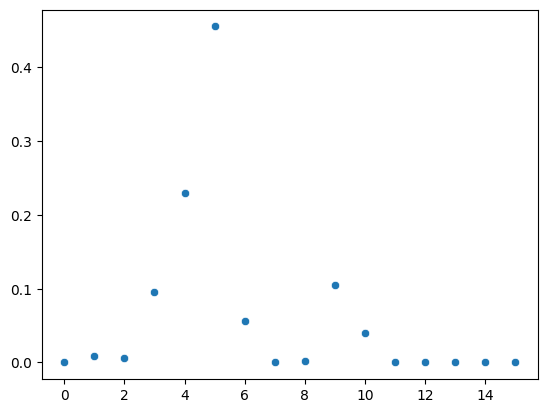

In [100]:
print(gbr.feature_importances_)

sns.scatterplot(gbr.feature_importances_)
plt.show()

<Axes: >

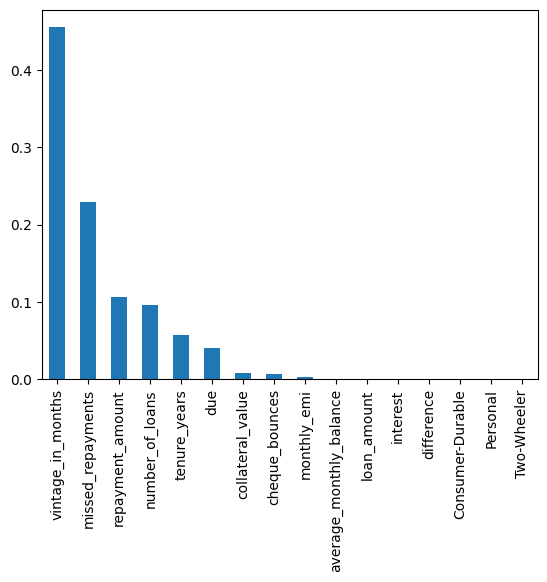

In [101]:
feature_importances = pd.Series(gbr.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='bar')

## Step 7: Extreme Gradient Boosting Regression

* **Adaboost Regression**

In [102]:

ada_reg = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
Adaboost=ada_reg.fit(X_train,y_train)
prediction=Adaboost.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=Adaboost.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.7705588849307212
test score:  0.7753143432164092


* **Using XGBoost Regressor**

Train Dataset

In [103]:
# Define the model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.977 (0.001)


Test Dataset

In [104]:
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.970 (0.002)


In [105]:
RegModel=XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [106]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.8997984846286473
test score:  0.896429166271675


* **Using ElasticNet : Hybrid Regularized Model**

In [107]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [108]:
elastic=ElasticNet(alpha=0.001).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.780, MSE:0.01, RMSE:0.10


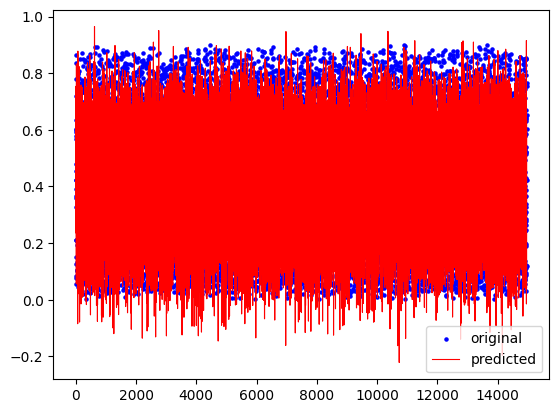

In [109]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [110]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print("Alpha: ",model.alpha_)
print("Intercept: ",model.intercept_)

Alpha:  0.0001
Intercept:  0.4241654676370257


In [111]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.781, MSE:0.01, RMSE:0.10


* **Using LightGBM**

In [112]:
plt.style.use('ggplot')

In [113]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2134
[LightGBM] [Info] Number of data points in the train set: 34922, number of used features: 16
[LightGBM] [Info] Start training from score 0.424165

LGBMRegressor()


In [114]:
y_pred = model.predict(X_test)
print("Rsqaured on test data: ",metrics.r2_score(y_test, y_pred))

Rsqaured on test data:  0.965125001305115


## Step 8: Model Evaluation: Hyperparameter Tuning

In [115]:

params = { 'max_depth': [3,4,5],
           'learning_rate': [0.01, 0.05, 0.1,0.25,0.5,0.015,1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='r2', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 1000}


* Defining the model with best resulted parameters for train and test dataset.


In [116]:
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.9959192885034708
test score:  0.9897083070417368


## *As per the results, we can see that this is the best model that has a score of almost 99% for both test and train datasets.*

# **Final Predictions:**

- Majority of the focus should be over Car and Two wheeler Loans.
- Customers who have missed on their Payment and have the high repayment should be at top prirority and should be highlighted
- Customer’s due factors and tenure are another subset of influencers to predict the loss given default of the customers.